## Import Libraries

In [ ]:
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import optimizers

# Helper libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os


In [ ]:
from tensorflow.keras.datasets import fashion_mnist

# load dataset
(train_images,train_labels),(test_images,test_labels)=fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


# Explore Date

In [ ]:
# Let's explore the format of the dataset before training the model. The following shows there are 60,000 images in
# the training set, with each image represented as 28 x 28 pixels:

In [ ]:
print(train_images.ndim)
print(train_labels.ndim)

3
1


In [ ]:
print(train_images.shape)
print(train_labels.shape)

(60000, 28, 28)
(60000,)


In [ ]:
print(train_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(10000,)


In [ ]:
train_labels ## There are 10 classes 

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
total_train=len(train_labels)
print("Total Train records: ",total_train)

total_test=len(test_labels)
print("Total Test records: ",total_test)

total= len(test_labels)+len(train_labels)
print("Total records: ",total)

train_perc= (total_train * 100)/total
print("Train records percentage: ",train_perc)

test_perc= (total_test * 100)/total
print("Test records percentage: ",test_perc)

print(train_perc+test_perc)

Total Train records:  60000
Total Test records:  10000
Total records:  70000
Train records percentage:  85.71428571428571
Test records percentage:  14.285714285714286
100.0


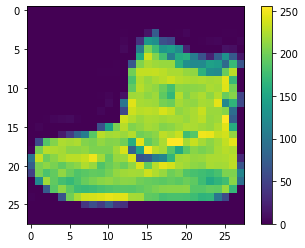

In [ ]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.show()

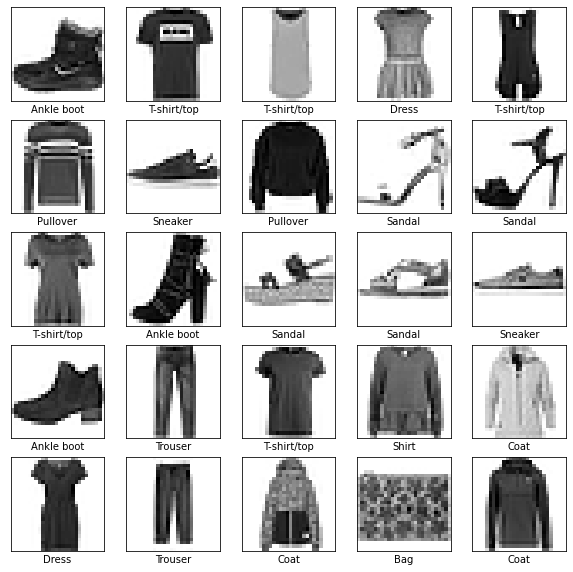

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# Data Preparation

In [ ]:
# You can’t feed lists of integers into a neural network. You have to turn your lists into tensors. 
# There are two ways to do that:
    
#  Pad your lists so that they all have same length, turn them into integer tensor of 
#    shape (samples, word_indices).
#  One-hot encode your lists to turn them into vectors of 0s and 1s. This would mean, for instance, 
#    turning the sequence [3, 5] into a 10,000-dimensional vector that would be all 0s except for 
#    indices 3 and 5, which would be 1s.

In [ ]:
##################################
# 1st step of data preaparation: #
##################################

# reshape dataset to have a single channel (Preparing Images)

# train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
# test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

In [ ]:
##################################
# 2nd step of data preaparation: #
##################################

# one hot encode target values (Preparing Labels)

# We need to categorically encode the labels,
# from tensorflow.keras.utils import to_categorical

# train_labels = to_categorical(train_labels)
# test_labels = to_categorical(test_labels)

In [ ]:
##################################
# 3rd step of data preaparation: #
##################################

# Create data in Pixel format Using Normalization:
# We know that the pixel values for each image in the dataset are unsigned integers in the range 
# between black and white, or 0 and 255.
# We do not know the best way to scale the pixel values for modeling, but we know that some scaling will be required.
# A good starting point is to normalize the pixel values of grayscale images, e.g. rescale them to the range [0,1]. 
# This involves first converting the data type from unsigned integers to floats, then dividing the pixel values by 
# the maximum value.

# scale pixels

# # convert from integers to floats
# train_norm = train.astype('float32')
# test_norm = test.astype('float32')
# # normalize to range 0-1
# train_norm = train_norm / 255.0
# test_norm = test_norm / 255.0

In [ ]:
# # # Reshaping and encoding of train and test data

from tensorflow.keras.utils import to_categorical

def reshape_encode():
    # load dataset
    (train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
#   (train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
    
    ######## 1st step ####### 
    # reshape dataset to have a single channel
    train_images = train_images.reshape((train_images.shape[0], 28, 28, 1)) # train_images.shape[0]= 60000
    test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))    # test_images.shape[0]= 10000
    
    ######## 2nd step #######
    # one hot encode target values
    train_labels = to_categorical(train_labels)
    test_labels = to_categorical(test_labels)
    
    return train_images, train_labels, test_images, test_labels

In [ ]:
# scale pixels
def prep_pixels(train, test):
    
    ######## 3rd step #######
    
    # convert from integers to floats
    train_norm = train.astype('float32')
    test_norm = test.astype('float32')
    # normalize to range 0-1
    train_norm = train_norm / 255.0
    test_norm = test_norm / 255.0
    
    # return normalized images
    return train_norm, test_norm

In [ ]:
# Reshaping and encoding of train and test data
train_images, train_labels, test_images, test_labels = reshape_encode()

# prepare pixel data
train_images, test_images = prep_pixels(train_images, test_images)

# The network architecture (Create Model)

## Find Best Model using keras_tuner library

In [ ]:
!pip install keras-tuner

     |████████████████████████████████| 71kB 7.0MB/s 
  Created wheel for keras-tuner: filename=keras_tuner-1.0.2-cp36-none-any.whl size=78939 sha256=90c1a2d4bfcb3c270b1f00530625142b8758fb1229559835555968ad75cf99d4
  Stored in directory: /root/.cache/pip/wheels/bb/a1/8a/7c3de0efb3707a1701b36ebbfdbc4e67aedf6d4943a1f463d6
  Created wheel for terminaltables: filename=terminaltables-3.1.0-cp36-none-any.whl size=15357 sha256=4b06183d4cb3d2f65db79c71932fa64dad5c0a18973fd31a43f4f624cd24951a
  Stored in directory: /root/.cache/pip/wheels/30/6b/50/6c75775b681fb36cdfac7f19799888ef9d8813aff9e379663e
Successfully built keras-tuner terminaltables


In [ ]:
def build_model(hp): 
  
  model = Sequential()
  # Must define the input shape in the first layer of the neural network
  model.add(Conv2D(filters=hp.Int('conv_0_filter', min_value=32, max_value=128, step=16), 
                  kernel_size=hp.Choice('conv_0_kernel', values = [3,5]), 
                  activation='relu', 
                  input_shape=(28,28,1))) 
  # model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(rate=hp.Float('dropout_0',min_value=0.0,max_value=0.5,default=0.25,step=0.05,)))

  for i in range(hp.Int('num_layers', 2, 6)):
    model.add(Conv2D(filters=hp.Int(f'conv_{i+1}_filter', min_value=32, max_value=128, step=16), 
                    kernel_size=hp.Choice(f'conv_{i+1}_kernel', values = [3,5]), 
                    activation='relu'
                    ) 
    )
    model.add(Dropout(rate=hp.Float(f'dropout_{i+1}',min_value=0.0,max_value=0.5,default=0.25,step=0.05,)))

  model.add(Flatten())
  model.add(Dense(64, activation='relu'))
  model.add(Dropout(rate=hp.Float(f'dropout_last',min_value=0.0,max_value=0.5,default=0.25,step=0.05,)))
  model.add(Dense(10, activation='softmax'))

  model.compile(optimizer=optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
                loss='categorical_crossentropy',
                metrics=['accuracy'])
      
  return model

In [ ]:
from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

In [ ]:
tuner_search=RandomSearch(build_model, # our function
                          objective='val_accuracy', # our objective is to improve val accuracy
                          max_trials=5, # the total number of trials to test
                          executions_per_trial=1, # the number of models that should be built and fit for each trial
                          directory='output', 
                          project_name="Mnist Fashion"
                          )


In [ ]:
tuner_search.search_space_summary()

In [ ]:
# It is the parameter specifying how big chunk of training data will be used for validation. It’s a float value between 0 and 1. 
# Validation data is not used for the training, but to evaluate the loss and the accuracy.
# For example: validation_split=0.3 will cause that 30% of the training data will be used for validation.

tuner_search.search(train_images,
                    train_labels,
                    epochs=5,
                    validation_split=0.1
                    )

Epoch 1/5
1688/1688 [==============================] - 12s 7ms/step - loss: 0.6839 - accuracy: 0.7566 - val_loss: 0.4409 - val_accuracy: 0.8383
Epoch 2/5
1688/1688 [==============================] - 12s 7ms/step - loss: 0.4565 - accuracy: 0.8396 - val_loss: 0.3698 - val_accuracy: 0.8640
Epoch 3/5
1688/1688 [==============================] - 12s 7ms/step - loss: 0.3907 - accuracy: 0.8610 - val_loss: 0.3190 - val_accuracy: 0.8773
Epoch 4/5
1688/1688 [==============================] - 12s 7ms/step - loss: 0.3471 - accuracy: 0.8757 - val_loss: 0.3042 - val_accuracy: 0.8833
Epoch 5/5
1688/1688 [==============================] - 12s 7ms/step - loss: 0.3184 - accuracy: 0.8861 - val_loss: 0.2912 - val_accuracy: 0.8892


Epoch 1/5
1688/1688 [==============================] - 13s 8ms/step - loss: 2.3122 - accuracy: 0.0971 - val_loss: 2.3053 - val_accuracy: 0.0942
Epoch 2/5
1688/1688 [==============================] - 13s 8ms/step - loss: 2.3039 - accuracy: 0.1014 - val_loss: 2.3043 - val_accuracy: 0.0973
Epoch 3/5
1688/1688 [==============================] - 13s 8ms/step - loss: 2.3041 - accuracy: 0.0978 - val_loss: 2.3025 - val_accuracy: 0.1032
Epoch 4/5
1688/1688 [==============================] - 13s 8ms/step - loss: 2.3040 - accuracy: 0.0993 - val_loss: 2.3036 - val_accuracy: 0.1003
Epoch 5/5
1688/1688 [==============================] - 13s 8ms/step - loss: 2.3041 - accuracy: 0.1006 - val_loss: 2.3039 - val_accuracy: 0.0925


Epoch 1/5
1688/1688 [==============================] - 10s 6ms/step - loss: 0.6335 - accuracy: 0.7706 - val_loss: 0.4361 - val_accuracy: 0.8447
Epoch 2/5
1688/1688 [==============================] - 10s 6ms/step - loss: 0.4208 - accuracy: 0.8478 - val_loss: 0.3724 - val_accuracy: 0.8665
Epoch 3/5
1688/1688 [==============================] - 10s 6ms/step - loss: 0.3581 - accuracy: 0.8702 - val_loss: 0.3138 - val_accuracy: 0.8835
Epoch 4/5
1688/1688 [==============================] - 10s 6ms/step - loss: 0.3194 - accuracy: 0.8854 - val_loss: 0.2958 - val_accuracy: 0.8910
Epoch 5/5
1688/1688 [==============================] - 10s 6ms/step - loss: 0.2905 - accuracy: 0.8940 - val_loss: 0.2903 - val_accuracy: 0.8938


Epoch 1/5
1688/1688 [==============================] - 15s 9ms/step - loss: 0.4807 - accuracy: 0.8242 - val_loss: 0.3147 - val_accuracy: 0.8835
Epoch 2/5
1688/1688 [==============================] - 15s 9ms/step - loss: 0.3193 - accuracy: 0.8844 - val_loss: 0.2764 - val_accuracy: 0.8968
Epoch 3/5
1688/1688 [==============================] - 15s 9ms/step - loss: 0.2767 - accuracy: 0.8971 - val_loss: 0.2748 - val_accuracy: 0.9005
Epoch 4/5
1688/1688 [==============================] - 15s 9ms/step - loss: 0.2492 - accuracy: 0.9091 - val_loss: 0.2658 - val_accuracy: 0.9030
Epoch 5/5
1688/1688 [==============================] - 15s 9ms/step - loss: 0.2267 - accuracy: 0.9149 - val_loss: 0.2458 - val_accuracy: 0.9103


Epoch 1/5
1688/1688 [==============================] - 16s 10ms/step - loss: 2.4189 - accuracy: 0.0981 - val_loss: 2.3034 - val_accuracy: 0.0925
Epoch 2/5
1688/1688 [==============================] - 16s 9ms/step - loss: 2.3038 - accuracy: 0.0980 - val_loss: 2.3037 - val_accuracy: 0.0973
Epoch 3/5
1688/1688 [==============================] - 16s 10ms/step - loss: 2.3052 - accuracy: 0.0961 - val_loss: 2.3040 - val_accuracy: 0.1003
Epoch 4/5
1688/1688 [==============================] - 16s 9ms/step - loss: 2.3042 - accuracy: 0.1005 - val_loss: 2.3031 - val_accuracy: 0.1027
Epoch 5/5
1688/1688 [==============================] - 16s 9ms/step - loss: 2.3039 - accuracy: 0.1003 - val_loss: 2.3032 - val_accuracy: 0.0973


INFO:tensorflow:Oracle triggered exit


## Use The Best Model From This Result

In [ ]:
model=tuner_search.get_best_models(num_models=1)[0]

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 48)        480       
_________________________________________________________________
dropout (Dropout)            (None, 26, 26, 48)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 80)        96080     
_________________________________________________________________
dropout_1 (Dropout)          (None, 22, 22, 80)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 20, 20, 112)       80752     
_________________________________________________________________
dropout_2 (Dropout)          (None, 20, 20, 112)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 18, 18, 64)        6

In [ ]:
# # Sample Run to speed up the process

# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
# from tensorflow.keras.layers import Conv2D, MaxPooling2D
# from tensorflow.keras import optimizers


# # Helper libraries
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt

# from tensorflow.keras.utils import to_categorical

# from tensorflow.keras.datasets import fashion_mnist

# # load dataset
# (train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
# # (train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# ######## 1st step ####### 
# # reshape dataset to have a single channel
# train_images = train_images.reshape((train_images.shape[0], 28, 28, 1)) # train_images.shape[0]= 60000
# test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))    # test_images.shape[0]= 10000

# ######## 2nd step #######
# # one hot encode target values
# train_labels = to_categorical(train_labels)
# test_labels = to_categorical(test_labels)


# ######## 3rd step #######
# # convert from integers to floats
# train_norm = train_images.astype('float32')
# test_norm = test_images.astype('float32')
# # normalize to range 0-1
# train_norm = train_norm / 255.0
# test_norm = test_norm / 255.0

# # !pip install keras-tuner


4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
# Strides:
# by default stride value is same as pool_size and we should never add stride parameter in maxpooling 
# but if we are using a stride parameter in conv2D, then by default stride value is 1.

#Padding:
# by default padding value is "valid", which means no padding and another value is "same", which means “pad in such a way as to have an output with 
# the same width and height as the input.” or we can use number like padding=2 or 3 or any number.


def getModel():
  final_model = Sequential()

  # Must define the input shape in the first layer of the neural network
  final_model.add(Conv2D(filters=48, kernel_size=3, activation='relu', input_shape=(28,28,1))) 
  # final_model.add(Conv2D(filters=48, kernel_size=3, stride=1, padding="valid", activation='relu', input_shape=(28,28,1))) 
  # final_model.add(MaxPooling2D(pool_size=2)) 
  # final_model.add(Dropout(0.1))

  final_model.add(Conv2D(filters=80, kernel_size=3, activation='relu'))
  final_model.add(MaxPooling2D(pool_size=2))
  final_model.add(Dropout(0.2))

  final_model.add(Conv2D(filters=96, kernel_size=3, activation='relu'))
  # final_model.add(MaxPooling2D(pool_size=2))
  # final_model.add(Dropout(0.1))

  final_model.add(Conv2D(filters=112, kernel_size=3, activation='relu'))
  # final_model.add(MaxPooling2D(pool_size=2))
  # final_model.add(Dropout(0.1))

  final_model.add(Conv2D(filters=146, kernel_size=3, activation='relu'))
  final_model.add(MaxPooling2D(pool_size=2))
  final_model.add(Dropout(0.2))


  final_model.add(Flatten())
  final_model.add(Dense(32, activation='relu'))
  final_model.add(Dropout(0.2))
  final_model.add(Dense(10, activation='softmax'))


  final_model.compile(optimizer=optimizers.Adam(learning_rate=0.0001),
                loss='categorical_crossentropy',
                metrics=['accuracy'])

  return final_model


###### 1st Layer #######
# input shape = 28*28*1
# kernal1= 3*3
# filter1= 48

# n= input_shape - kernal1 + 1 => 28-3+1 => 26
# output shape= (None, n=26 , n=26 , filter1=48)

# parameters = filter1 * ( kernal1_shape + Bias )  => 48 * ((3*3) + 1) => 480 


###### 2nd Layer #######
# input shape = 26*26*1
# kernal2= 3*3
# filter2= 80

# n= input_shape - kernal2 + 1 => 26-3+1 => 24
# output shape= (None, n=24 , n=24 , filter2=80)

# parameters = filter2 * ( (kernal2_shape*filter1) + Bias )  => 80 * (((3*3)*48) + 1) => 34640 


####### Max Pooling #########
# input shape = 24*24*1
# pool_size = 2
# filter2= 80

# n= input_shape / pool_size => 24 / 2 => 12
# output shape= (None, n=12 , n=12 , filter2=80)


####### flatten #######
# flatten: convert multi dim into 1 dim
# previous_output_shape= (None, 4, 4, 112)

# n = covert previous_output_shape into 1D => 4*4*112 => 1792
# flatten = (None, n=1792)


######### dense #########
# previous_output_shape= (None, 1792)
# filter= 32

# parameter= (previous_output_shape+1)*filter => (1792+1) * 32 => 57376 


######### Total Parameter ###########
# Total parameters = add all parameters
# Total_params= 480   +   34640   +   69216   +   96880   +   57376   +   330  = 258,922


In [ ]:
# Take a look at the model summary
getModel().summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 48)        480       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 80)        34640     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 80)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 80)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 96)        69216     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 112)         96880     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 6, 6, 146)         1

In [ ]:
final_model=getModel()
hist = final_model.fit(train_images, train_labels, epochs=16, validation_split=0.1 ) #initial_epoch=5

Epoch 1/16
1688/1688 [==============================] - 9s 5ms/step - loss: 0.8743 - accuracy: 0.6846 - val_loss: 0.5151 - val_accuracy: 0.8100
Epoch 2/16
1688/1688 [==============================] - 9s 5ms/step - loss: 0.5664 - accuracy: 0.7962 - val_loss: 0.4373 - val_accuracy: 0.8360
Epoch 3/16
1688/1688 [==============================] - 9s 5ms/step - loss: 0.4786 - accuracy: 0.8299 - val_loss: 0.3696 - val_accuracy: 0.8610
Epoch 4/16
1688/1688 [==============================] - 9s 5ms/step - loss: 0.4250 - accuracy: 0.8490 - val_loss: 0.3410 - val_accuracy: 0.8767
Epoch 5/16
1688/1688 [==============================] - 9s 5ms/step - loss: 0.3889 - accuracy: 0.8618 - val_loss: 0.3181 - val_accuracy: 0.8810
Epoch 6/16
1688/1688 [==============================] - 9s 5ms/step - loss: 0.3566 - accuracy: 0.8726 - val_loss: 0.2949 - val_accuracy: 0.8883
Epoch 7/16
1688/1688 [==============================] - 9s 5ms/step - loss: 0.3363 - accuracy: 0.8806 - val_loss: 0.2950 - val_accuracy:

In [ ]:
final_model.save('/content/drive/My Drive/saved_models/fashion_cnn_final.h5')

In [ ]:
final_model=tf.keras.models.load_model("/content/drive/My Drive/saved_models/fashion_cnn_final.h5")

## Evaluate Model (Testing)

In [ ]:
# Two quantities are displayed during training: the loss of the network over the training
# data, and the accuracy of the network over the training data.

In [ ]:
# We quickly reach an accuracy of 0.9246 (92.46%) on the training data. Now let’s
# check that the model performs well on the test set, too:

test_loss, test_acc = final_model.evaluate(test_images,  test_labels)

print('\nTest accuracy:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.2502 - accuracy: 0.9085

Test accuracy: 0.9085000157356262


In [ ]:
# The test-set accuracy turns out to be 91.78%—that’s quite a bit lower than the training
# set accuracy. This gap of around 0.5% between training accuracy and test accuracy is an example of overfitting

In [ ]:
# model.predict(test_images)

In [ ]:
history_dict = hist.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

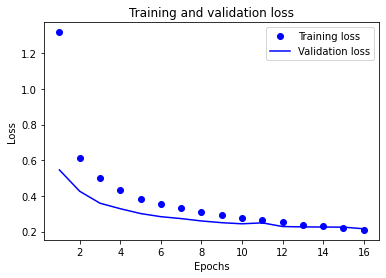

In [ ]:
history_dict = hist.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo' , label='Training loss') # bo= blue dots
plt.plot(epochs, val_loss_values, 'b', label='Validation loss') # b= blue solid line
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
# plt.legend(loc=9) OR plt.legend(loc='best') OR plt.legend(loc='upper left')
# plt.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)
plt.show()

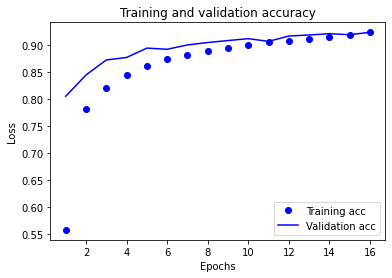

In [ ]:
plt.clf()
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, history_dict['accuracy'], 'bo', label='Training acc') # bo= blue dots
plt.plot(epochs, history_dict['val_accuracy'], 'b', label='Validation acc') # b= blue solid line
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
# plt.legend(loc=9) OR plt.legend(loc='best') OR plt.legend(loc='upper left')
# plt.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)
plt.show() 

# Make Predictions

In [ ]:

(train_img, train_lab), (test_img, test_lab) = fashion_mnist.load_data()

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# print("Prediction:",model.predict_classes(test_images[[13]]))
print("Prediction:",class_names[int(np.argmax(final_model.predict(test_images[[13]]), axis=-1))])
# np.argmax(model.predict(test_images[[13]]), axis=-1)
print("Real val:",class_names[np.argmax(test_labels[13])])

Prediction: Dress
Real val: Dress


In [ ]:

predictions = final_model.predict(test_images)
predictions # Here, the model has predicted the label for each image in the testing set.

array([[3.3947447e-14, 6.7879201e-12, 1.5110687e-13, ..., 6.4445167e-06,
        6.0607427e-13, 9.9999344e-01],
       [3.2035857e-07, 3.7858300e-10, 9.9996758e-01, ..., 1.0853340e-12,
        7.8942382e-12, 3.7313305e-11],
       [1.3382734e-18, 1.0000000e+00, 4.9531683e-18, ..., 3.7245107e-19,
        5.8211392e-18, 3.0488001e-26],
       ...,
       [2.5431673e-12, 4.0824595e-16, 2.6907900e-13, ..., 1.6320068e-16,
        1.0000000e+00, 1.5303332e-19],
       [1.3488907e-14, 1.0000000e+00, 1.6228320e-15, ..., 2.2052797e-17,
        2.1595354e-16, 3.6381578e-22],
       [4.1038256e-06, 5.1552402e-06, 6.4568922e-05, ..., 7.7639677e-02,
        5.0775037e-04, 1.8961390e-03]], dtype=float32)

In [ ]:
def plot_image(i, prediction_array):
  real_label, img = test_lab[i], test_img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(prediction_array)
  
  if predicted_label == real_label:
    color = 'g'
  else:
    color = 'red'

  plt.xlabel("Labels")

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],100*np.max(prediction_array),class_names[real_label]),color=color)



# 5.2.5
def plot_images(imgs, labels=None, rows=1, figsize=(20,8), fontsize=14):
    figure = plt.figure(figsize=figsize)
    cols = max(1,len(imgs) // rows-1)
    labels_present = False
    # checking if labels is a numpy array
    if type(labels).__module__ == np.__name__:
        labels_present=labels.any()
    elif labels:
        labels_present=True
    for i in range(len(imgs)):
        subplot = figure.add_subplot(rows, cols+1, i+1)
        # axis off, but leave a bounding box
        plt.tick_params(
            axis='both',
            which='both',
            bottom='off',
            top='off',
            left='off',
            right='off',
            labelbottom='off',
            labelleft='off')
        # plot labels if present
        if labels_present:
            subplot.set_title(labels[i], fontsize=fontsize)
        plt.imshow(imgs[i][:,:,0], cmap='Greys')



def plot_value_array(i, prediction_array):

  real_label = test_lab[i]

  plt.xticks(rotation=50)
  plt.yticks(np.linspace(1,100,10))

  thisplot = plt.bar(class_names, prediction_array*100, color="b")

  predicted_label = np.argmax(prediction_array)

  if predicted_label == real_label:
    thisplot[predicted_label].set_color('g')
  else:
    thisplot[predicted_label].set_color('red')
    thisplot[real_label].set_color('g')

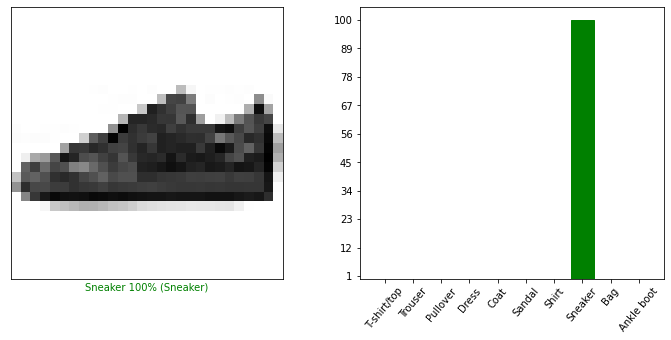

In [ ]:
i = 22
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plot_image(i, predictions[i])

plt.subplot(1,2,2)
plot_value_array(i, predictions[i])

plt.show()

Prediction:  Coat


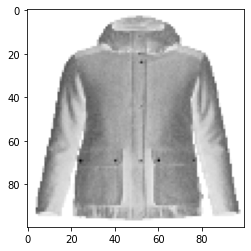

In [ ]:
# import outside image and then predict
import cv2
# from skimage import io
# from PIL import Image

def prepare_img(filepath):

  img_size=28
  # img_array = io.imread(filepath, as_gray=True)
  # img_array = Image.open(filepath).convert('LA')
  img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
  # new_array = img_array.resize((img_size, img_size))
  new_array = cv2.resize(img_array, (img_size, img_size))

  plt.imshow(new_array, cmap=plt.cm.binary)

  img_size1=100
  img_array1 = cv2.imread("/content/drive/My Drive/cnn_images/coat-removebg-preview.png", cv2.IMREAD_GRAYSCALE)
  new_array1 = cv2.resize(img_array1, (img_size1, img_size1))
  plt.imshow(new_array1, cmap=plt.cm.binary)

  return np.array(new_array).reshape(-1, img_size, img_size, 1)

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

prediction = final_model.predict([prepare_img("/content/drive/My Drive/cnn_images/coat-removebg-preview.png")])

print("Prediction: ",class_names[int(np.argmax(prediction))])

# **Data Augmentation**

# **Creating training data with augmentation**

# **ROTATION**

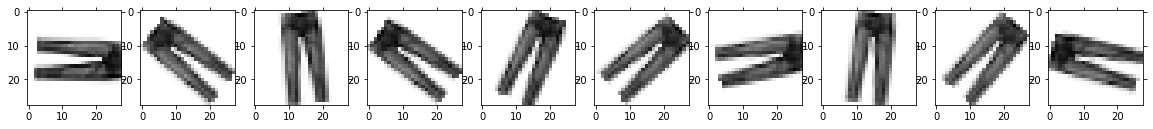

In [ ]:
img = train_images[16]

img_shifted = [ tf.keras.preprocessing.image.random_rotation(
    img, 
    rg=100,
    # wrg=0.1, 
    # hrg=0.2, 
    row_axis=0, 
    col_axis=1, 
    channel_axis=2, 
    fill_mode='constant',
    cval=0
) for _ in range(10) ]
plot_images(img_shifted)

# **Shift**

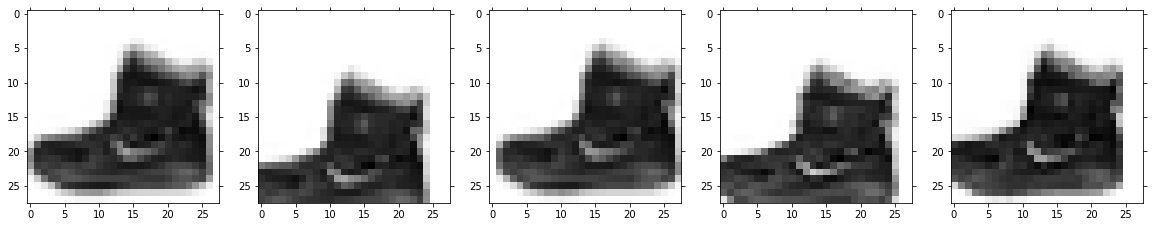

In [ ]:
img = train_images[0]

img_shifted = [ tf.keras.preprocessing.image.random_shift(
    img, 
    wrg=0.1, 
    hrg=0.2, 
    row_axis=0, 
    col_axis=1, 
    channel_axis=2, 
    fill_mode='constant',
    cval=0
) for _ in range(5) ]
plot_images(img_shifted)

# **Shear**

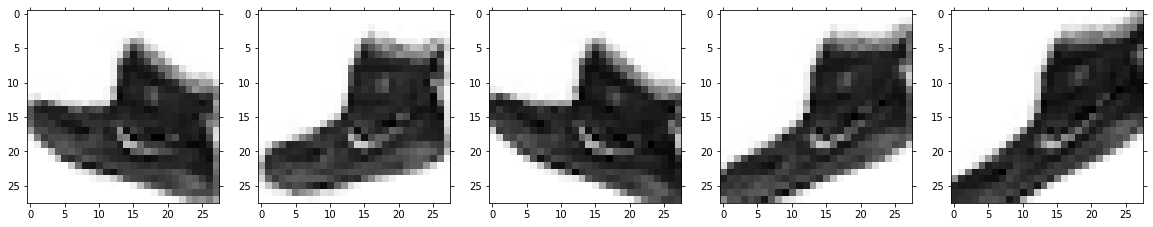

In [ ]:
img= train_images[0]

img_sheared = [ tf.keras.preprocessing.image.random_shear(
    img,
    intensity=40,
    row_axis=0,
    col_axis=1,
    channel_axis=2,
    fill_mode='constant',
    cval=0
) for _ in range(5) ]
plot_images(img_sheared, figsize=(20,16))

# **ZOOM**

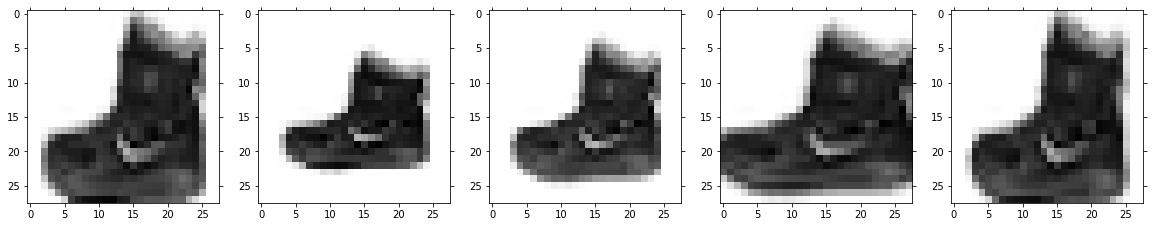

In [ ]:
img_zoomed = [ tf.keras.preprocessing.image.random_zoom(
    img,
    zoom_range=(0.7,1.3),
    row_axis=0,
    col_axis=1,
    channel_axis=2,
    fill_mode='constant',
    cval=0
) for _ in range(5) ]
plot_images(img_zoomed)

In [ ]:

# x: Input tensor. Must be 3D.
# intensity: Transformation intensity in degrees.
# row_axis: Index of axis for rows in the input tensor.
# col_axis: Index of axis for columns in the input tensor.
# channel_axis: Index of axis for channels in the input tensor.
# fill_mode: Points outside the boundaries of the input are filled according to the given mode (one of {'constant', 'nearest', 'reflect', 'wrap'}).
# cval: Value used for points outside the boundaries of the input if mode='constant'.

In [ ]:
pip install wandb

     |████████████████████████████████| 1.8MB 8.9MB/s 
     |████████████████████████████████| 102kB 9.8MB/s 
     |████████████████████████████████| 163kB 19.3MB/s 
     |████████████████████████████████| 102kB 9.7MB/s 
     |████████████████████████████████| 133kB 24.1MB/s 
     |████████████████████████████████| 71kB 9.7MB/s 
  Created wheel for subprocess32: filename=subprocess32-3.5.4-cp36-none-any.whl size=6489 sha256=19ec11640f2faf48fcdfd8399334c895e6981c60b27c8f952c1e790cd2cec2c5
  Stored in directory: /root/.cache/pip/wheels/68/39/1a/5e402bdfdf004af1786c8b853fd92f8c4a04f22aad179654d1
  Created wheel for watchdog: filename=watchdog-1.0.1-cp36-none-any.whl size=72206 sha256=741a891a748da927a9d204f509d9047dffa4163d71235d725c1cff928933b34f
  Stored in directory: /root/.cache/pip/wheels/d8/ce/d8/31a48288b5728794feda5ac479fa324cc1cde4398c29eff064
Successfully built subprocess32 watchdog


In [ ]:
import wandb
from wandb.keras import WandbCallback

In [ ]:
# Reshaping and encoding of train and test data
train_images, train_labels, test_images, test_labels = reshape_encode()

# prepare pixel data
train_images, test_images = prep_pixels(train_images, test_images)

In [ ]:
# featurewise_center=False,  # set input mean to 0 over the dataset
# samplewise_center=False,  # set each sample mean to 0
# featurewise_std_normalization=False,  # divide inputs by std of the dataset
# samplewise_std_normalization=False,  # divide each input by its std
# zca_whitening=False,  # apply ZCA whitening

# shear_range=0.5,
# zoom_range=(0.9, 1.1),
# rotation_range=20,  # randomly rotate images in the range (degrees, 0 to 180)
# width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
# height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
# horizontal_flip=True,  # randomly flip images
# vertical_flip=False,  # randomly flip images


datagen = ImageDataGenerator(
        # width_shift_range=0.1,
        # height_shift_range=0.1,
        # zoom_range=(0.9, 1.1),
        # shear_range=40,
        rotation_range=100,  
        horizontal_flip=True,
        vertical_flip=True, 
        fill_mode='constant',
        cval=0
)

datagen.fit(train_images)

# batches = 0
# max_batches = 100
# img_gen = []
# i=0;
# for x_batch in gen.flow(train_images, batch_size=max_batches):
#     img_gen.append(x_batch[batches])
#     batches += 1
#     if batches >= max_batches:
#         # generator loops indefinetly
#         break

In [ ]:
tf.config.batch_size = 256
tf.config.epochs=60
wandb.init()

final_model=getModel()

final_model.fit_generator(datagen.flow(train_images, train_labels, batch_size=tf.config.batch_size),
                        steps_per_epoch=train_images.shape[0] // tf.config.batch_size,
                        epochs=tf.config.epochs,
                        validation_data=(test_images, test_labels),
                        callbacks=[WandbCallback()]
)

epoch,24
loss,0.80949
accuracy,0.71205
val_loss,0.77306
val_accuracy,0.7243
_step,24
_runtime,300
_timestamp,1607990682
best_val_loss,0.7692
best_epoch,23


epoch,▁▁▂▂▂▂▃▃▃▄▄▄▅▅▅▅▆▆▆▇▇▇▇██
loss,█▆▅▄▄▃▃▃▃▃▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁
accuracy,▁▃▄▅▅▆▆▆▆▇▇▇▇▇▇▇▇▇███████
val_loss,█▇▅▅▄▄▃▃▃▃▂▂▂▂▂▂▂▂▁▂▁▁▁▁▁
val_accuracy,▁▃▄▅▅▅▆▆▆▆▇▆▇▇▇▇▆▇▇▇█████
_step,▁▁▂▂▂▂▃▃▃▄▄▄▅▅▅▅▆▆▆▇▇▇▇██
_runtime,▁▁▂▂▂▂▃▃▃▄▄▄▅▅▅▅▆▆▆▇▇▇▇██
_timestamp,▁▁▂▂▂▂▃▃▃▄▄▄▅▅▅▅▆▆▆▇▇▇▇██


Epoch 1/60
234/234 [==============================] - 12s 51ms/step - loss: 1.8231 - accuracy: 0.3126 - val_loss: 1.4349 - val_accuracy: 0.4905
Epoch 2/60
234/234 [==============================] - 12s 50ms/step - loss: 1.4630 - accuracy: 0.4585 - val_loss: 1.3317 - val_accuracy: 0.5429
Epoch 3/60
234/234 [==============================] - 12s 52ms/step - loss: 1.3535 - accuracy: 0.5054 - val_loss: 1.1971 - val_accuracy: 0.5866
Epoch 4/60
234/234 [==============================] - 12s 53ms/step - loss: 1.2673 - accuracy: 0.5392 - val_loss: 1.1464 - val_accuracy: 0.6011
Epoch 5/60
234/234 [==============================] - 12s 53ms/step - loss: 1.2038 - accuracy: 0.5645 - val_loss: 1.0904 - val_accuracy: 0.6151
Epoch 6/60
234/234 [==============================] - 13s 54ms/step - loss: 1.1439 - accuracy: 0.5881 - val_loss: 1.0500 - val_accuracy: 0.6232
Epoch 7/60
234/234 [==============================] - 12s 53ms/step - loss: 1.0993 - accuracy: 0.6054 - val_loss: 1.0304 - val_accuracy:

In [ ]:
final_model.save('/content/drive/My Drive/saved_models/fashion_cnn_final_aug.h5')

In [ ]:
test_loss, test_acc = final_model.evaluate(test_images,  test_labels)

print('\nTest accuracy:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.4257 - accuracy: 0.8487

Test accuracy: 0.8486999869346619


In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# print("Prediction:",model.predict_classes(test_images[[13]]))
print("Prediction:",class_names[int(np.argmax(final_model.predict(test_images[[13]]), axis=-1))])
# np.argmax(model.predict(test_images[[13]]), axis=-1)
print("Real val:",class_names[np.argmax(test_labels[13])])

Prediction: Dress
Real val: Dress


Prediction:  Trouser


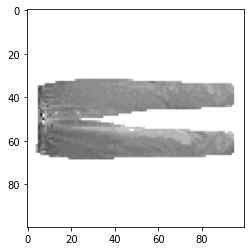

In [ ]:
prediction = final_model.predict([prepare_img("/content/drive/My Drive/cnn_images/trouser111-removebg-preview.png")])

print("Prediction: ",class_names[int(np.argmax(prediction))])

In [ ]:
    # Get training data
    # x_n_samples, y_n_samples = get_random_sample(number_of_samples=samples)
    # y_n_samples = to_categorical(y_n_samples)
    
    # Put data in generator
    # train_generator_n_samples = gen.flow(train_images, 
    #                         train_labels, 
    #                         batch_size=30)
    
    # model_n_samples = getModel()

    # hist_n_samples = model_n_samples.fit_generator(
    #             train_generator_n_samples,
    #             steps_per_epoch=2000,
    #             epochs=15,
    #             verbose=0,
    #             validation_data=(test_images, test_labels),
    #             shuffle=True
    # )

In [ ]:
# datagen = ImageDataGenerator(
#         rotation_range=20,
#         width_shift_range=0.1,
#         height_shift_range=0.1,
#         shear_range=0.5,
#         zoom_range=(0.9, 1.1),
#         horizontal_flip=False,
#         vertical_flip=False, 
#         fill_mode='constant',
#         cval=0
# )
# batches = 0
# max_batches = 100
# img_gen = []
# for x_batch in datagen.flow(img.reshape((1,) + img.shape), batch_size=max_batches):
#     img_gen.append(x_batch[0])
#     batches += 1
#     if batches >= max_batches:
#         # generator loops indefinetly
#         break
        
# plot_images(img_gen, rows=10, figsize=(20,16))